# **Carregando as dependências e prepararando o ambiente**


## Passo 1: Certifique-se de instalar o xgboost e outras bibliotecas necessárias:

In [21]:
!pip install xgboost scikit-learn

## Passo 2: Importar as bibliotecas e carregar os dados

In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Passo 3: Montar o Google Drive

In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Passo 4: Carregar nosso modelo

In [24]:
model = xgb.XGBClassifier()
model.load_model('/content/drive/Shareddrives/CODEFÓLIO/minicurso-eres/Modelos/xgb_model.json')

## Passo 5: Carregar os dataser

In [25]:
# Carregar os datasets pré-processados
X_train = pd.read_csv('/content/drive/Shareddrives/CODEFÓLIO/minicurso-eres/datasets/X_train_processed.csv')
y_train = pd.read_csv('/content/drive/Shareddrives/CODEFÓLIO/minicurso-eres/datasets/y_train_processed.csv').values.ravel()  # Converter para array 1D

X_test = pd.read_csv('/content/drive/Shareddrives/CODEFÓLIO/minicurso-eres/datasets/X_test_processed.csv')
y_test = pd.read_csv('/content/drive/Shareddrives/CODEFÓLIO/minicurso-eres/datasets/y_test_processed.csv').values.ravel()


Passo 6: Realizar a divisão dos dados

In [26]:
X_new, _, y_new, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Treinamento do classificador

## Passo 1: Treinamento do modelo

In [27]:
model.fit(
    X_new,
    y_new,
    eval_set=[(X_new, y_new)],
    xgb_model=model.get_booster()
)


[0]	validation_0-logloss:0.01266
[1]	validation_0-logloss:0.01049
[2]	validation_0-logloss:0.00891
[3]	validation_0-logloss:0.00770
[4]	validation_0-logloss:0.00677
[5]	validation_0-logloss:0.00604
[6]	validation_0-logloss:0.00551
[7]	validation_0-logloss:0.00490
[8]	validation_0-logloss:0.00448
[9]	validation_0-logloss:0.00403
[10]	validation_0-logloss:0.00377
[11]	validation_0-logloss:0.00349
[12]	validation_0-logloss:0.00329
[13]	validation_0-logloss:0.00311
[14]	validation_0-logloss:0.00298
[15]	validation_0-logloss:0.00281
[16]	validation_0-logloss:0.00268
[17]	validation_0-logloss:0.00253
[18]	validation_0-logloss:0.00239
[19]	validation_0-logloss:0.00229
[20]	validation_0-logloss:0.00219
[21]	validation_0-logloss:0.00209
[22]	validation_0-logloss:0.00198
[23]	validation_0-logloss:0.00188
[24]	validation_0-logloss:0.00180
[25]	validation_0-logloss:0.00169
[26]	validation_0-logloss:0.00163
[27]	validation_0-logloss:0.00157
[28]	validation_0-logloss:0.00149
[29]	validation_0-loglos

XGBClassifier(base_score='4.6547222E-1', booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              feature_types=['float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float', 'fl...
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Passo 2: Avaliação do modelo

In [28]:

y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

## Passo 3: Visualização dos resultados

Acurácia: 0.7854418026969482
Precision: 0.8247530298485704
Recall: 0.7854418026969482
F1 Score: 0.7847646421336256


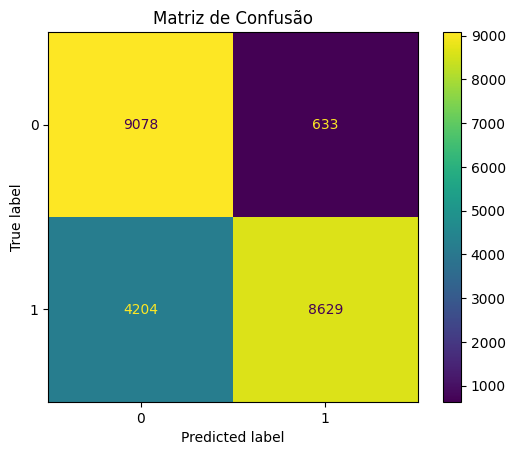

In [29]:
print("Acurácia:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Matriz de Confusão')
plt.show()